# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Regression Challenge
Week 3 | Day 5

## The Times university ranking dataset analysis

In this challenge, you will draw on the skills you have learned over the past three weeks to create a model of university prestige using the provided predictors. Specifically, your goal is to **predict the total score for the university for the year 2016**.


- You will be provided with the data and targets from 2011 through 2015 and the data (no targets) for 2016.<br><br>

- Before 12:00pm, all final answers should be submitted by filling in the  predicted values for each university in the submission sheet. (.to_csv() should be useful for this). <br><br>

- Your submission will be assessed on MSE -- so consider your loss functions! <br><br>

## The Dataset

The data is in a csv file in your repo. It contains the following columns:

- **world_rank** - world rank for the university. Contains rank ranges and equal ranks (e.g. = 94 and 201-250).
- **university_name** - name of university.
- **country** - country of each university.
- **teaching** - university score for teaching (the learning environment).
- **international** - university score international outlook (staff, students, research).
- **research** - university score for research (volume, income and reputation).
- **citations** - university score for citations (research influence).
- **income** - university score for industry income (knowledge transfer).
- **total_score** - total score for university, used to determine rank.
- **num_students** - number of students at the university.
- **student_staff_ratio** - Number of students divided by number of staff.
- **international_students** - Percentage of students who are international.
- **female_male_ratio** - Female student to Male student ratio.
- **year** - year of the ranking (2011 to 2016 included).

The target is the **total score**, which directly corresponds to the final ranking.

**N.B. - if the total score is reported as "-" that will be considered a 0 when scoring.**

## Guidelines

The analysis is up to you. **This is fully open-ended.** You are expected to:

- Load the packages you need to do analysis
- Perform EDA on variables of interest
- Form a hypothesis or hypotheses on what is important for the score
- Check your data for problems, clean and munge data into correct formats
- Create or combine new columns/features where beneficial
- Perform statistical analysis with regression and describe the results

---

I will be here in class to help, but if you do not know how to do something, I expect you to **check documentation first**.

**You are not expected to know how to do things by heart. Knowing how to effectively look up the answers on the internet is a critical skill for data scientists!**

## Teams

Finally, you will be working as part of a team on this. To the randomizer...

In [53]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline

In [54]:
df = pd.read_csv('datasets/challenge-dataset.csv', na_values=['-'], encoding='latin1')

In [55]:
def rem_symbol(x):
    try:
        for i in [',', '%']:
            x = x.replace(i, '')
            return float(x)
    except:
        return np.nan
        print x

In [56]:
df['num_students'] = df['num_students'].map(rem_symbol)

In [57]:
df['percent_international_students'] = df['international_students'].map(lambda x: float(str(x).strip('%')))

In [58]:
def fm_ratio(x):
    if type(x) == float:
        return x
    try:
        return float(x)
    except:
        x = x.split(':')
        f = x[0]
        m = x[1]
        try:
            return float(f)/float(m)
        except:
            if float(f) > 0:
                return float(f)

In [59]:
df['female_male_ratio'] = df['female_male_ratio'].map(fm_ratio)

In [60]:
df.loc[df['country']=='Unisted States of America', 'country'] = 'United States of America'
df.loc[df['country']=='Unted Kingdom', 'country'] = 'United Kingdom'

In [61]:
country_dict = {}
count = 0
for i in df['country'].unique():
    country_dict[i] = count
    count += 1
df['country_number'] = df['country'].map(country_dict)

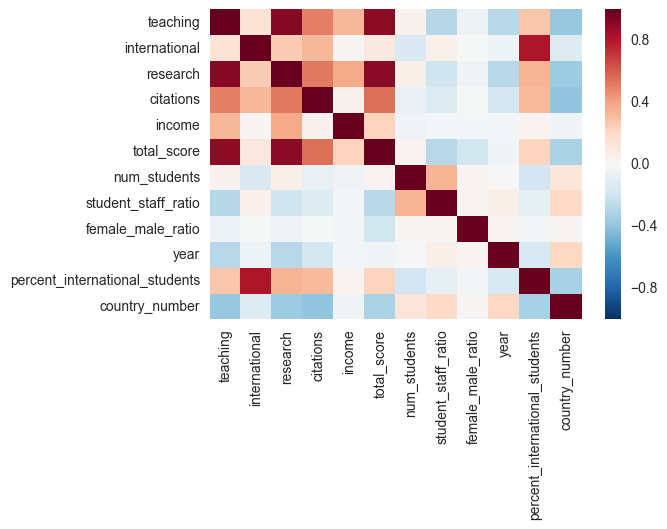

In [62]:
sns.heatmap(df.corr())

# How Alex wanted it to be done

In [63]:
df3 = df.copy()

In [64]:
df3['to_drop'] = df3['world_rank'].map(lambda x: 'drop' if '-' in x else x)

In [65]:
df4 = df3[df3['to_drop']!='drop']

In [69]:
predict

,world_rank,university_name,country,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,female_male_ratio,year,percent_international_students,country_number,to_drop
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,2243.0,6.9,27%,0.492537,2016,27.0,0,1
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,19919.0,11.6,34%,0.851852,2016,34.0,1,2
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,15596.0,7.8,22%,0.724138,2016,22.0,0,3
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,18812.0,11.8,34%,0.851852,2016,34.0,1,4
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,11074.0,9.0,33%,0.587302,2016,33.0,0,5
1808,6,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,20152.0,8.9,25%,NaN,2016,25.0,0,6
1809,7,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,7929.0,8.4,27%,0.818182,2016,27.0,0,7
1810,8,Imperial College London,United Kingdom,83.3,96.0,88.5,96.7,53.7,15060.0,11.7,51%,0.587302,2016,51.0,1,8
1811,9,ETH Zurich Ð Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80.0,18178.0,14.7,37%,0.449275,2016,37.0,2,9
1812,10,University of Chicago,United States of America,85.7,65.0,88.9,99.2,36.6,14221.0,6.9,21%,0.724138,2016,21.0,0,10


In [86]:
features = df.columns.values.tolist()[3:]
features.remove('female_male_ratio')
features.remove('international_students')

train = df4[df4['year'] != 2016]
predict = df4.copy()[df4['year'] == 2016]
train = train.copy()
train.dropna(inplace=True)
predict = predict.copy()
predict = predict.drop('total_score', axis=1)

features.remove('total_score')
X_train = train[features]
X = predict[features]
X = X.copy()
y_train = train['total_score']

In [87]:
X.fillna(0,inplace=True)

In [88]:
r2 = linear_model.RidgeCV(cv=5)
mx = r2.fit(X_train, y_train)
px = mx.predict(X)

In [91]:
mx.score(X_train, y_train)

0.99954040074006145

In [94]:
px = pd.DataFrame(px, columns=['pred_score'])

In [95]:
predict.reset_index(drop=True, inplace=True)

In [98]:
final = pd.concat([predict, px], axis=1)

In [21]:
new_test = final[['university_name', 'pred_score']]

In [22]:
submit = pd.read_csv('datasets/ranking-submission.csv', encoding='latin1')

In [23]:
new_sub = submit.merge(new_test, how='left', on='university_name')

In [24]:
new_sub.drop('total_score', inplace=True, axis=1)

In [25]:
new_sub

,world_rank,university_name,pred_score
0,1,California Institute of Technology,95.104229
1,2,University of Oxford,93.953870
2,3,Stanford University,93.720756
3,4,University of Cambridge,92.596815
4,5,Massachusetts Institute of Technology,91.844535
5,6,Harvard University,91.493941
6,7,Princeton University,89.918683
7,8,Imperial College London,88.948360
8,9,ETH Zurich Ð Swiss Federal Institute of Techno...,88.024798
9,10,University of Chicago,87.833692


# How we did it

In [26]:
features = df.columns.values.tolist()[3:]
features.remove('female_male_ratio')
features.remove('international_students')

In [27]:
features

[u'teaching',
 u'international',
 u'research',
 u'citations',
 u'income',
 u'total_score',
 u'num_students',
 u'student_staff_ratio',
 u'year',
 'percent_international_students',
 'country_number']

In [28]:
df2 = df.copy()
train = df2[df2['year'] != 2016]
predict = df2.copy()[df2['year'] == 2016]
train = train.copy()
train.dropna(inplace=True)
predict = predict.copy()
predict = predict.drop('total_score', axis=1)

In [29]:
# predict.dropna(inplace=True)
predict.fillna(0, inplace=True)
features.remove('total_score')

In [30]:
X_train = train[features]
X = predict[features]
y_train = train['total_score']

In [31]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
model.score(X_train, y_train)

0.99954040385548926

In [32]:
lasso = linear_model.LassoCV(cv=5)
m2 = lasso.fit(X_train, y_train)
print m2.score(X_train, y_train)
l_predict = m2.predict(X)
l_predict = pd.DataFrame(l_predict, columns=['lscores'])

0.999474385802


In [33]:
from sklearn.cross_validation import cross_val_predict, cross_val_score

/Applications/anaconda/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
cross_val_score(linear_model.Ridge(), X_train, y_train, cv=5)

array([ 0.99753372,  0.99972069,  0.99979045,  0.9998776 ,  0.99939682])

In [35]:
r = linear_model.RidgeCV(cv=5)
m3 = r.fit(X_train, y_train)
print m3.score(X_train, y_train)
r_predict = m3.predict(X)
r_predict = pd.DataFrame(r_predict, columns=['rscores'])

0.99954040074


In [36]:
predicted = model.predict(X)
predicted = pd.DataFrame(predicted, columns=['scores'])

In [37]:
predict = predict.reset_index(drop=True)

In [38]:
predictions = pd.concat([predict, predicted, r_predict, l_predict], axis=1)

In [39]:
check = predictions[['university_name', 'scores', 'rscores', 'lscores']]

In [40]:
feat_co = pd.DataFrame([features, model.coef_.tolist(), m3.coef_.tolist(), m2.coef_.tolist()],\
                       index=['features', 'coef','ridge','lasso']).T

In [41]:
m3.alpha_

10.0

In [42]:
m2.alpha_

0.35332992104073563

In [43]:
feat_co

,features,coef,ridge,lasso
0,teaching,0.299177,0.299166,0.298508
1,international,0.0673121,0.0672952,0.0684345
2,research,0.300598,0.300603,0.301986
3,citations,0.304878,0.304853,0.301037
4,income,0.0253693,0.0253665,0.0239791
5,num_students,1.05242e-06,1.04876e-06,-8.37723e-07
6,student_staff_ratio,-0.000623499,-0.000628185,0
7,year,-0.06029,-0.059822,-0
8,percent_international_students,0.00631768,0.00634545,0
9,country_number,0.00689968,0.00689085,0


In [44]:
check.sort_values(by='scores', ascending=False)

,university_name,scores,rscores,lscores
0,California Institute of Technology,95.103664,95.104229,95.196888
1,University of Oxford,93.953515,93.953870,94.045323
2,Stanford University,93.720467,93.720756,93.882115
3,University of Cambridge,92.596340,92.596815,92.714998
4,Massachusetts Institute of Technology,91.844142,91.844535,91.901901
5,Harvard University,91.493438,91.493941,91.664599
6,Princeton University,89.918154,89.918683,90.082404
7,Imperial College London,88.947443,88.948360,88.965638
8,ETH Zurich Ð Swiss Federal Institute of Techno...,88.024165,88.024798,88.120201
9,University of Chicago,87.833091,87.833692,88.024637


In [45]:
final = check.sort_values(by='scores', ascending=False)

In [46]:
mmj_submit = submit.merge(final)

In [47]:
mmj_submit.head()

,world_rank,university_name,total_score,scores,rscores,lscores
0,1,California Institute of Technology,NaN,95.103664,95.104229,95.196888
1,2,University of Oxford,NaN,93.953515,93.953870,94.045323
2,3,Stanford University,NaN,93.720467,93.720756,93.882115
3,4,University of Cambridge,NaN,92.596340,92.596815,92.714998
4,5,Massachusetts Institute of Technology,NaN,91.844142,91.844535,91.901901


In [48]:
mmj_submit.drop(['total_score', 'scores', 'lscores'],axis=1, inplace=True)

In [49]:
mmj_submit

,world_rank,university_name,rscores
0,1,California Institute of Technology,95.104229
1,2,University of Oxford,93.953870
2,3,Stanford University,93.720756
3,4,University of Cambridge,92.596815
4,5,Massachusetts Institute of Technology,91.844535
5,6,Harvard University,91.493941
6,7,Princeton University,89.918683
7,8,Imperial College London,88.948360
8,9,ETH Zurich Ð Swiss Federal Institute of Techno...,88.024798
9,10,University of Chicago,87.833692


In [50]:
mmj_submit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 3 columns):
world_rank         800 non-null object
university_name    800 non-null object
rscores            800 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.0+ KB


In [51]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
world_rank         800 non-null object
university_name    800 non-null object
total_score        0 non-null float64
dtypes: float64(1), object(2)
memory usage: 18.8+ KB


In [52]:
mmj_submit

,world_rank,university_name,rscores
0,1,California Institute of Technology,95.104229
1,2,University of Oxford,93.953870
2,3,Stanford University,93.720756
3,4,University of Cambridge,92.596815
4,5,Massachusetts Institute of Technology,91.844535
5,6,Harvard University,91.493941
6,7,Princeton University,89.918683
7,8,Imperial College London,88.948360
8,9,ETH Zurich Ð Swiss Federal Institute of Techno...,88.024798
9,10,University of Chicago,87.833692
